<a href="https://colab.research.google.com/github/sainisatish/Assignment_AI_Associate/blob/main/Dataset_Prepration_BallTracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import cv2
import time
import csv
import os                       

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Assignment_ball_track/datasetv2.csv")

In [4]:
dataset

,color,x_vlaue,y_value,w_value,h_value,image_name
0,yellow,628,776,864,716,img6.jpg
1,yellow,627,775,865,717,img16.jpg
2,yellow,630,774,862,718,img26.jpg
3,yellow,628,778,866,716,img36.jpg
4,yellow,630,774,862,718,img46.jpg
...,...,...,...,...,...,...
584,yellow,675,675,761,761,img5865.jpg
585,Green,262,740,812,334,img5866.jpg
586,yellow,674,674,762,762,img5900.jpg
587,Green,262,740,812,334,img5901.jpg


In [5]:
image_list = dataset["image_name"]
img_path = "/content/drive/MyDrive/Assignment_ball_track/data/" 
print(f"Num of images : {len(image_list)}")

Num of images : 589


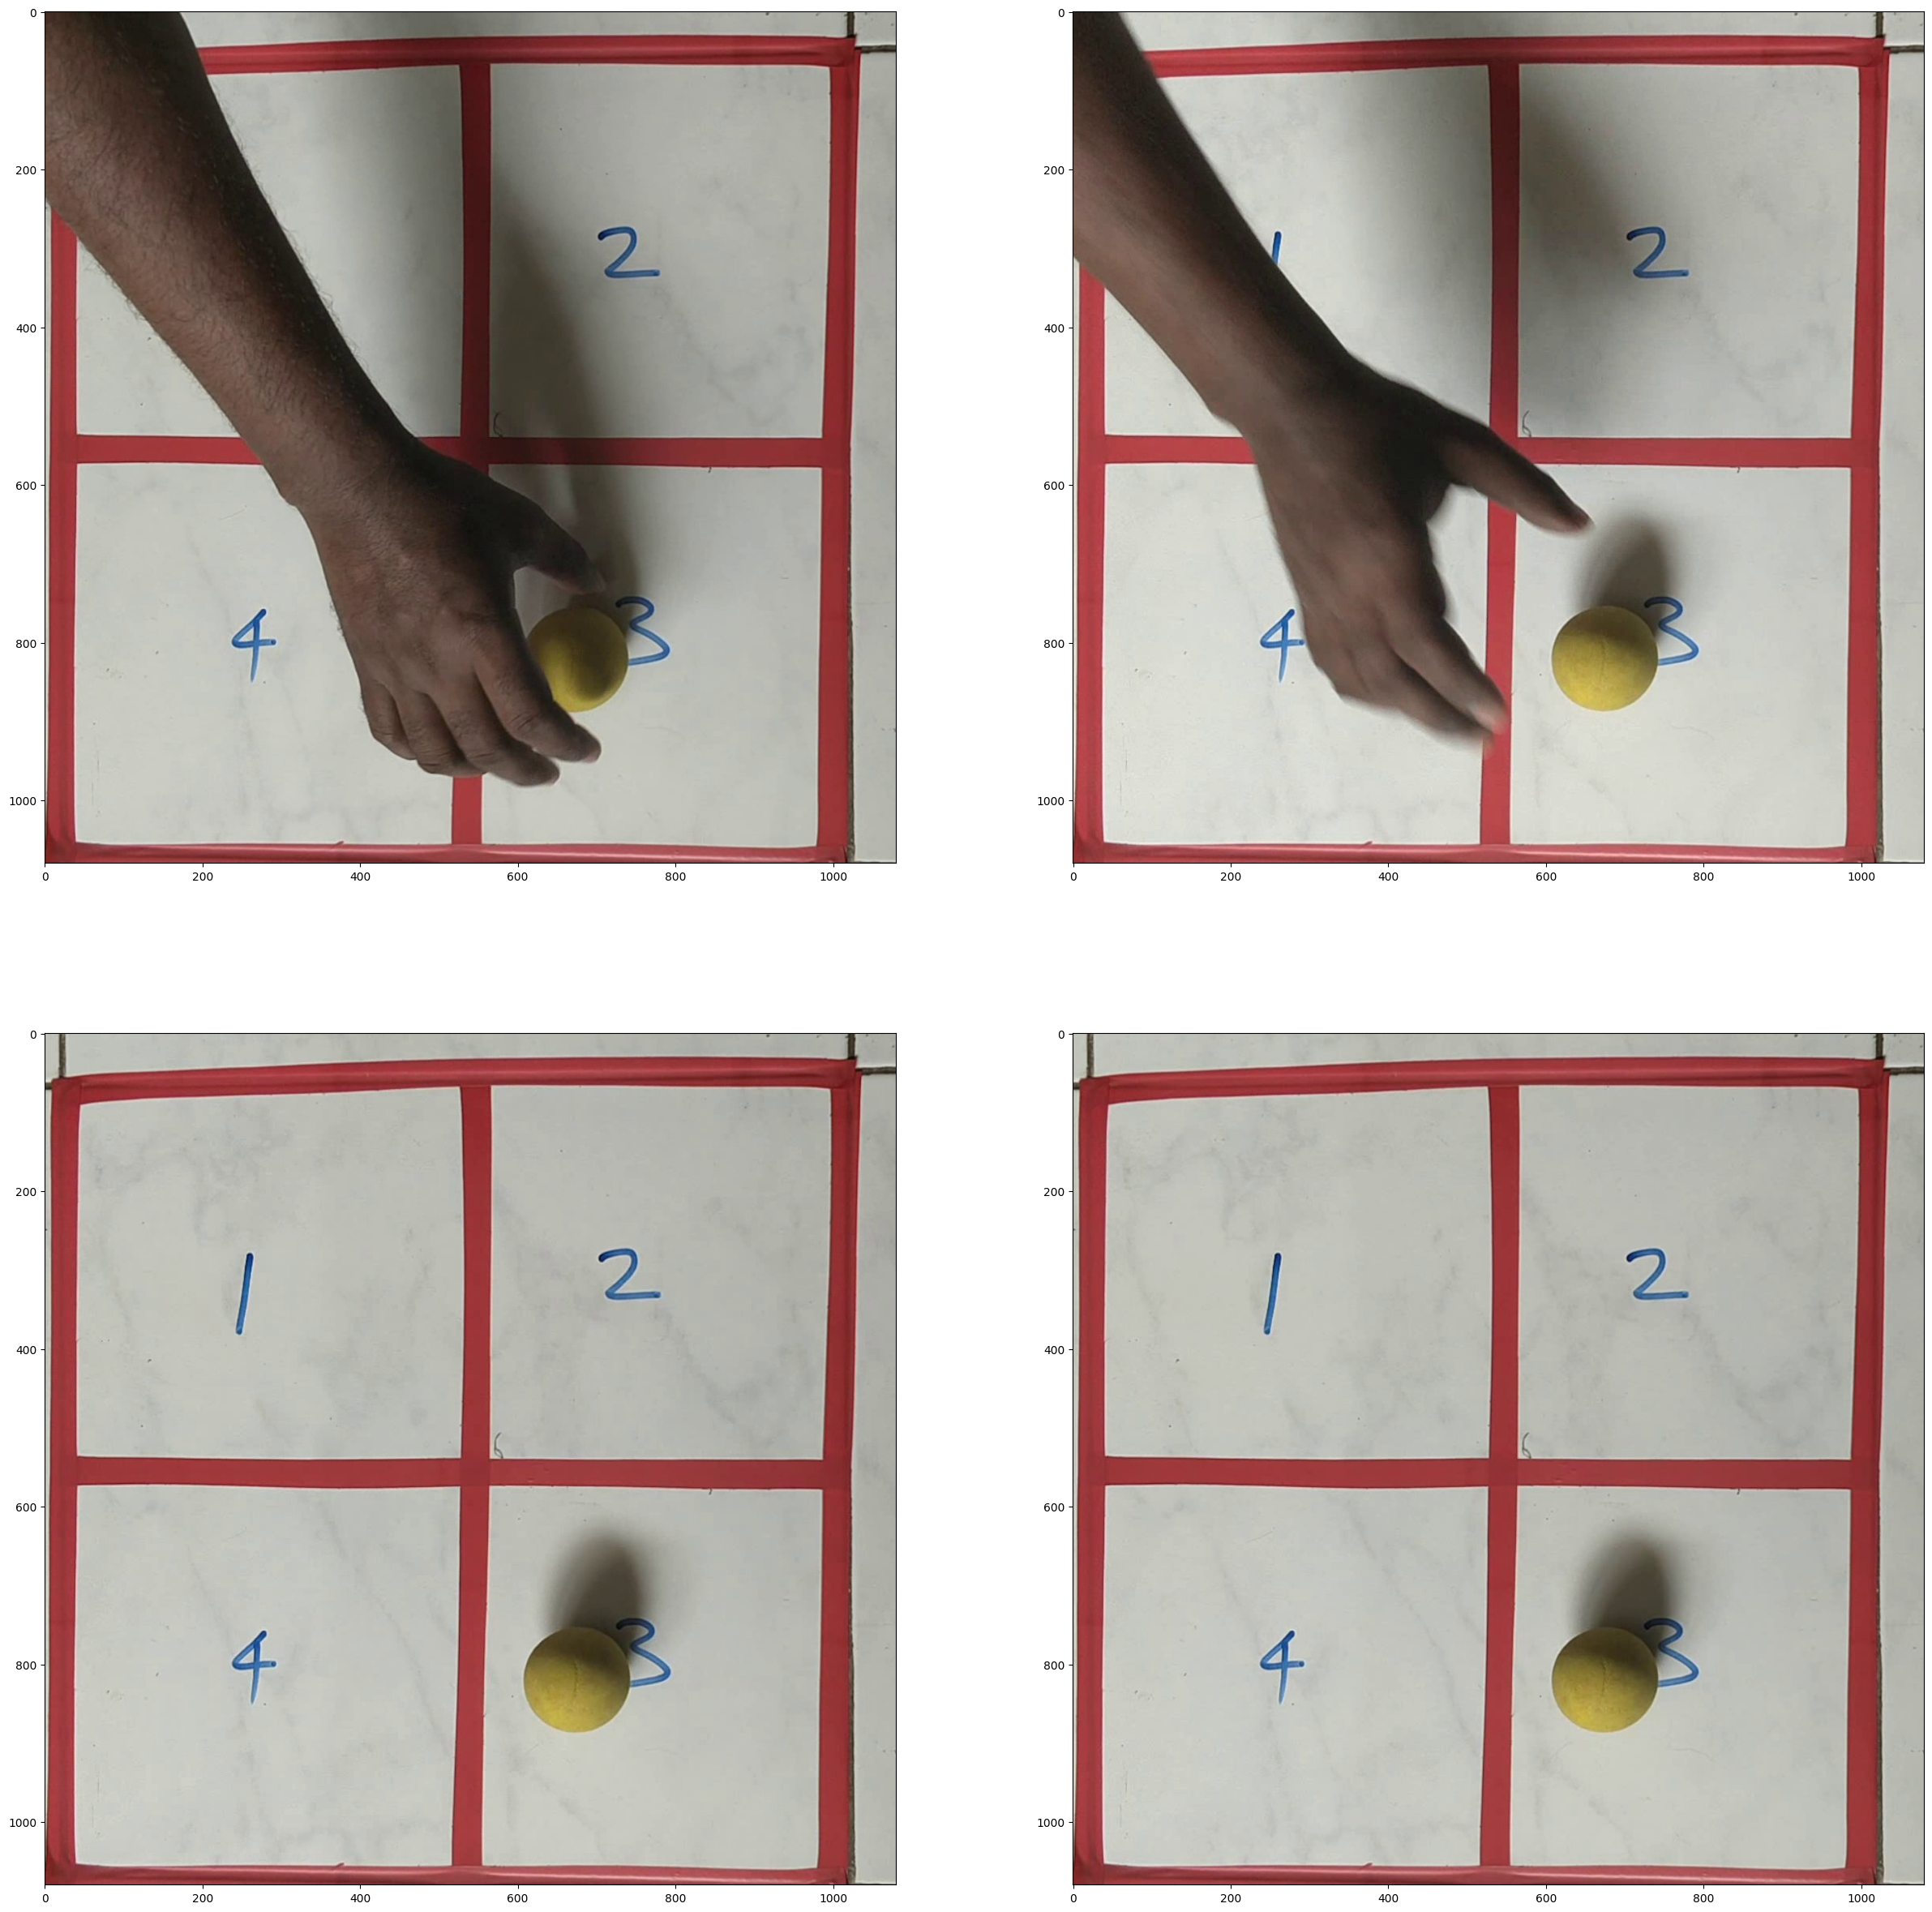

In [6]:
fig = plt.figure(figsize=(30,30)) 
for i in range(4):
    ax = fig.add_subplot(2,2,i+1) 
    img_p = img_path+image_list[i]
    img = plt.imread(img_p)
    img = plt.imshow(img)          

In [7]:
columns = dataset.columns

In [8]:
columns

Index(['color', 'x_vlaue', 'y_value', 'w_value', 'h_value', 'image_name'], dtype='object')

In [9]:
dataset[columns[:5]]

,color,x_vlaue,y_value,w_value,h_value
0,yellow,628,776,864,716
1,yellow,627,775,865,717
2,yellow,630,774,862,718
3,yellow,628,778,866,716
4,yellow,630,774,862,718
...,...,...,...,...,...
584,yellow,675,675,761,761
585,Green,262,740,812,334
586,yellow,674,674,762,762
587,Green,262,740,812,334


In [10]:
dataset["color"].unique()

array(['yellow', 'white', 'Green', 'RED'], dtype=object)

In [11]:
from tqdm import tqdm

In [12]:
img_path="/content/drive/MyDrive/Assignment_ball_track/data/"

In [29]:
img = glob.glob("/content/drive/MyDrive/Assignment_ball_track/darknet/data/Image/"+"*.jpg")

In [26]:
target_path ="/content/drive/MyDrive/Assignment_ball_track/darknet/data/Image/"

In [ ]:
#Resizing Image from (1080,1080) to (256,256) , as per image size labels also need to resized. 

In [18]:
for i in tqdm(range(len(image_list))):
    img = img_path+image_list[i]
    img = cv2.imread(img,cv2.IMREAD_ANYCOLOR)
    img = cv2.resize(img,(256,256))
    cv2.imwrite(target_path+image_list[i],img)

100%|██████████| 589/589 [03:34<00:00,  2.74it/s]


In [ ]:
color =  list(dataset[columns[0]])
x_value = dataset[columns[1]]
y_value = dataset[columns[2]]
w_value = dataset[columns[3]]
h_value = dataset[columns[4]]
image_name = dataset[columns[5]]   

In [ ]:
x_value = [int(value*0.23703703703) for value in x_value]
y_value = [int(value*0.23703703703) for value in y_value]
w_value = [int(value*0.23703703703) for value in w_value]
h_value = [int(value*0.23703703703) for value in h_value]

In [ ]:
data = pd.DataFrame([color,x_value,y_value,w_value,h_value,image_name])
data = data.transpose()
data.columns = ["color","x_value","y_value","w_value","h_value","image_name"]

In [ ]:
data.to_csv("dataset256.csv")

In [ ]:
data # labels are resize as per image size

,color,x_value,y_value,w_value,h_value,image_name
0,yellow,148,183,204,169,img6.jpg
1,yellow,148,183,205,169,img16.jpg
2,yellow,149,183,204,170,img26.jpg
3,yellow,148,184,205,169,img36.jpg
4,yellow,149,183,204,170,img46.jpg
...,...,...,...,...,...,...
584,yellow,159,159,180,180,img5865.jpg
585,Green,62,175,192,79,img5866.jpg
586,yellow,159,159,180,180,img5900.jpg
587,Green,62,175,192,79,img5901.jpg


In [ ]:
# Now we need to save txt file corresponding to the Images and we need to store it's labels data.

In [20]:
image_name = []
for i in tqdm(range(len(image_list))):
    img = img_path+image_list[i]
    img = cv2.imread(img,cv2.IMREAD_ANYCOLOR)
    img = np.flip(img,axis=0)  # Fillip vertical
    name = 'v'+image_list[i]
    cv2.imwrite(target_path+"v"+image_list[i],img)
    image_name.append(name)

100%|██████████| 589/589 [00:40<00:00, 14.64it/s]


In [ ]:
v_labels = data.copy()
v_labels["y_value"] = v_labels["y_value"].apply(lambda x : 256 - x)
v_labels["h_value"] = v_labels["h_value"].apply(lambda x : 256 - x)

In [ ]:
v_labels["image_name"] = image_name

In [ ]:
aug_labels = np.concatenate((data,v_labels))

In [21]:
image_name = []
for i in tqdm(range(len(image_list))):
    img = img_path+image_list[i]
    img = cv2.imread(img,cv2.IMREAD_ANYCOLOR)
    img = np.flip(img,axis=1) #fillip Horizontal
    name = 'h'+image_list[i]
    cv2.imwrite(target_path+"h"+image_list[i],img)
    image_name.append(name)

100%|██████████| 589/589 [00:47<00:00, 12.32it/s]


In [ ]:
len(image_name)

589

In [ ]:
h_labels = data.copy()
h_labels["y_value"] = h_labels["y_value"].apply(lambda x : 256 - x)
h_labels["h_value"] = h_labels["h_value"].apply(lambda x : 256 - x)
h_labels["image_name"] = image_name

In [ ]:
aug_labels = np.concatenate((aug_labels,h_labels))

In [22]:
import random
image_name = []
for i in tqdm(range(len(image_list))):
    img = img_path+image_list[i]
    img = cv2.imread(img,cv2.IMREAD_ANYCOLOR)
    img = np.clip(random.uniform(1,2)*img,0.0,255.0)  # Increase brightness
    img = img.astype("uint8")
    name = 'b'+image_list[i]
    cv2.imwrite(target_path+"b"+image_list[i],img)
    image_name.append(name)

100%|██████████| 589/589 [01:19<00:00,  7.45it/s]


In [ ]:
b_labels = data.copy()
b_labels["image_name"] = image_name

In [ ]:
aug_labels = np.concatenate((aug_labels,b_labels))

In [23]:
blur_img = []
kernel_size = (3, 3)
sigma = 0
image_name = []
for i in tqdm(range(len(image_list))):
    img = img_path+image_list[i]
    img = cv2.imread(img,cv2.IMREAD_ANYCOLOR)
    img = cv2.GaussianBlur(img, kernel_size, sigma)
    name = 'br'+image_list[i]
    cv2.imwrite(target_path+"br"+image_list[i],img)
    image_name.append(name)

100%|██████████| 589/589 [00:39<00:00, 14.97it/s]


In [ ]:
br_labels = data.copy()
br_labels["image_name"] = image_name

In [ ]:
aug_labels = np.concatenate((aug_labels,br_labels))

In [ ]:
csv_data = aug_labels.copy()

In [ ]:
csv_data = np.asarray(csv_data)

In [ ]:
np.save("data.npy",csv_data)

In [ ]:
datacsv = pd.DataFrame(csv_data)

In [ ]:
datacsv.columns = columns

In [ ]:
datacsv.to_csv("aug_csv.csv")

In [24]:
aug_csv = pd.read_csv("/content/drive/MyDrive/Assignment_ball_track/aug_csv.csv")

In [25]:
aug_csv.shape

(2945, 7)

In [26]:
for image_name, group in aug_csv.groupby('image_name'):
    with open(target_path+image_name.replace('.jpg', '.txt'), 'w') as f:
        for i, row in group.iterrows():
            color_index = ['yellow', 'white', 'Green', 'RED'].index(row['color'])
            x_center = row['x_vlaue'] / 256
            y_center = row['y_value'] / 256
            width = row['w_value'] / 256
            height = row['h_value'] / 256
            line = f"{color_index} {x_center} {y_center} {width} {height}\n"
            f.write(line)                                                         

In [ ]:
color_index= ['yellow', 'white', 'Green', 'RED']

In [ ]:
!git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955
Receiving objects: 100% (5955/5955), 6.37 MiB | 11.08 MiB/s, done.
Resolving deltas: 100% (3932/3932), done.


In [ ]:
!pwd

/content/darknet


In [15]:
import glob
import os
current_dir = "/content/drive/MyDrive/Assignment_ball_track/darknet/data/Image/"
# Percentage of images to be used for the valid set
percentage_test = 10;
# Create train.txt and valid.txt
file_train = open('train.txt', 'w')  
file_test = open('test.txt', 'w')
# Populate train.txt and valid.txt
counter = 1  
index_test = round(100 / percentage_test)  
for file in glob.iglob(os.path.join(current_dir, '*.jpg')):  
    title, ext = os.path.splitext(os.path.basename(file))
    if counter == index_test:
        counter = 1
        file_test.write("/data/Images/" + title + '.jpg' + "\n")
        
    else:
        file_train.write("/data/Images/" + title + '.jpg' + "\n")
        
        counter = counter + 1
file_test.close()
file_train.close()

In [28]:
#Now finished all the configuration

In [2]:
import os
os.chdir("/content/drive/MyDrive/Assignment_ball_track/darknet")

In [2]:
!pwd

/content/drive/MyDrive/Assignment_ball_track/darknet


In [4]:
!make

make: Nothing to be done for 'all'.


In [6]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2023-04-10 05:21:00--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  20.0MB/s    in 8.8s    

2023-04-10 05:21:10 (17.6 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [9]:
!pwd

/content/drive/MyDrive/Assignment_ball_track/darknet


In [4]:
!chmod -R +rwx /content/drive/MyDrive/Assignment_ball_track/darknet

In [5]:
!chmod +x /content/drive/MyDrive/Assignment_ball_track/darknet/darknet

In [6]:
!./darknet detector train "/content/drive/MyDrive/Assignment_ball_track/darknet/cfg/objective.data" "/content/drive/MyDrive/Assignment_ball_track/darknet/cfg/yolov3_custom.cfg" "/content/drive/MyDrive/Assignment_ball_track/darknet/darknet53.conv.74" | tee -a log.txt

backup: Using default '/backup/'
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   256 x 256 x   3   ->   256 x 256 x  32  0.113 BFLOPs
    1 conv     64  3 x 3 / 2   256 x 256 x  32   ->   128 x 128 x  64  0.604 BFLOPs
    2 conv     32  1 x 1 / 1   128 x 128 x  64   ->   128 x 128 x  32  0.067 BFLOPs
    3 conv     64  3 x 3 / 1   128 x 128 x  32   ->   128 x 128 x  64  0.604 BFLOPs
    4 res    1                 128 x 128 x  64   ->   128 x 128 x  64
    5 conv    128  3 x 3 / 2   128 x 128 x  64   ->    64 x  64 x 128  0.604 BFLOPs
    6 conv     64  1 x 1 / 1    64 x  64 x 128   ->    64 x  64 x  64  0.067 BFLOPs
    7 conv    128  3 x 3 / 1    64 x  64 x  64   ->    64 x  64 x 128  0.604 BFLOPs
    8 res    5                  64 x  64 x 128   ->    64 x  64 x 128
    9 conv     64  1 x 1 / 1    64 x  64 x 128   ->    64 x  64 x  64  0.067 BFLOPs
   10 conv    128  3 x 3 / 1    64 x  64 x  64   ->    64 x  64 x 128  0.604 BFLOPs
   1

In [22]:
!pwd

/content/drive/MyDrive/Assignment_ball_track/darknet


In [52]:
!ls -l /content/drive/MyDrive/Assignment_ball_track/darknet/data/color.names

-rwx------ 1 root root 25 Apr 10 05:11 /content/drive/MyDrive/Assignment_ball_track/darknet/data/color.names


In [37]:
!chmod +rwx /content/drive/MyDrive/Assignment_ball_track/darknet/data/

In [34]:
!chmod +rwx /content/drive/MyDrive/Assignment_ball_track/darknet/data/valid.txt

In [38]:
!ls -l /content/drive/MyDrive/Assignment_ball_track/darknet/data

total 3327
-rw------- 1 root root   94180 Apr  9 16:59 9k.labels
-rw------- 1 root root   99137 Apr  9 16:59 9k.names
-rw------- 1 root root  140047 Apr  9 16:59 9k.tree
-rw------- 1 root root     387 Apr  9 16:59 coco9k.map
-rw------- 1 root root     625 Apr  9 16:59 coco.names
-rw------- 1 root root      25 Apr 10 05:11 color.names
-rw------- 1 root root  163759 Apr  9 16:59 dog.jpg
-rw------- 1 root root  141886 Apr  9 16:59 eagle.jpg
-rw------- 1 root root  382965 Apr  9 16:59 giraffe.jpg
-rw------- 1 root root      80 Apr  9 16:59 goal.txt
-rw------- 1 root root  133495 Apr  9 16:59 horses.jpg
drwx------ 2 root root    4096 Apr 10 03:56 Image
-rw------- 1 root root  218420 Apr  9 16:59 imagenet.labels.list
-rw------- 1 root root  246356 Apr  9 16:59 imagenet.shortnames.list
-rw------- 1 root root     972 Apr  9 16:59 inet9k.map
-rw------- 1 root root 1415684 Apr  9 16:59 kite.jpg
-rw------- 1 root root    5476 Apr  9 16:59 openimages.names
-rw------- 1 root root  113880 Apr  9 16:

In [1]:
!git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955
Receiving objects: 100% (5955/5955), 6.37 MiB | 16.78 MiB/s, done.
Resolving deltas: 100% (3932/3932), done.
